In [1]:
from matplotlib import pyplot as plt

from gym_env_market.BertrandEnv import *
from agents import *

In [2]:
env = BertrandEnv()

/Users/calla/anaconda3/lib/python3.11/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [3]:
print(env.observation_space)

Box(1.06, 1.54, (2,), float32)


In [4]:
agent1 = QLearningAgent(env.action_space.n, env.action_space.n)
agent2 = QLearningAgent(env.action_space.n, env.action_space.n)

In [5]:
print(agent1.q_table)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


training

In [6]:
prices_1 = []
prices_2 = []


for episode in range(10000):
    state = env.reset()
    done = False


    i = 0
    while not done:
        # Sélection des actions
        action1 = agent1.choose_action(state[0])
        action2 = agent2.choose_action(state[1])

        # Interaction avec l'environnement
        next_state, rewards, done, _ = env.step([action1, action2])

        # Mise à jour des Q-tables
        agent1.update(state[0], action1, rewards[0], next_state[0])
        agent2.update(state[1], action2, rewards[1], next_state[1])

        state = next_state

        i += 1
        if i > 200:
            break

    # Décroissance de l'exploration après chaque épisode
    agent1.decay_epsilon()
    agent2.decay_epsilon()

# Test

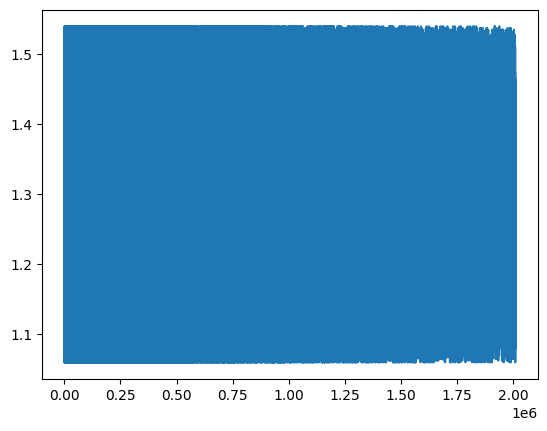

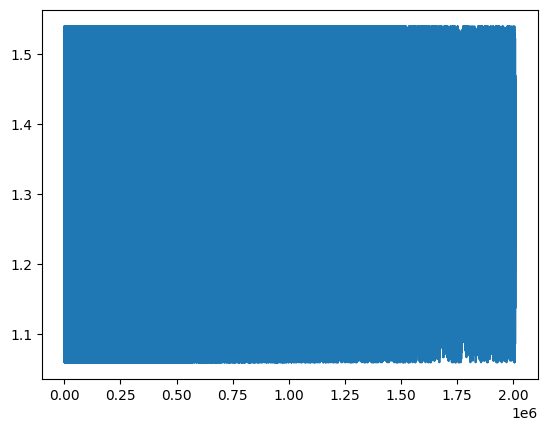

In [7]:
plt.figure(1)
plt.plot(prices_1)
plt.figure(2)
plt.plot(prices_2)
plt.show()